<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok</b>
1. Chiquito Shaduq Aurick Fulvian - 1301210284
2. Nama - NIM
3. Nama - NIM

## <b>Latar Belakang</b>
<p>Proyek ini dibuat untuk memenuhi tugas Project Based Assignment CLO-4 mata kuliah Pembelajaran Mesin prodi S1 Informatika Fakultas Informatika Telkom University Bandung.</p>
<p>Dataset yang digunakan untuk proyek ini adalah dataset "Rice (Cammeo and Osmancik)" yang didapatkan di tautan berikut,
https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik</p>
<p>Jenis prediksi yang dilakukan pada dataset ini adalah prediksi <b> klasifikasi </b> dengan menggunakan model .....</p>

##### <b> Deskripsi Dataset </b>
A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.

##### <b> Informasi Tambahan </b>
Among  the certified rice grown in TURKEY,  the  Osmancik species, which has a large planting area since 1997 and the Cammeo species grown since 2014 have been selected for the study.  When  looking  at  the  general  characteristics  of  Osmancik species, they have a wide, long, glassy and dull appearance.  When looking at the general characteristics of the Cammeo species, they have wide and long, glassy and dull in appearance.  A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice. 

Missing value : tidak ada

Terdapat 7 Fitur dan 3810 Record

Informasi Variabel
- Area - Returns the number of pixels within the boundaries of the rice grain : Integer
- Perimeter - Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain: Continuous
- Major_Axis_Length - The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives : Continuous
- Minor_Axis_Length - The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives : Continuous
- Eccentricity - It measures how round the ellipse, which has the same moments as the rice grain, is : Continous
- Convex_Area - Returns the pixel count of the smallest convex shell of the region formed by the rice grain : Integer
- Extent - Returns the ratio of the region formed by the rice grain to the bounding box : Continuous
- Class - Cammeo and Osmancik : Binary (<b> Target </b>)

## <b>Explarotory Data Analysis (EDA)</b>

In [93]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [94]:
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

In [95]:
rice_cammeo_and_osmancik

{'data': {'ids': None,
  'features':        Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
  0     15231  525.578979         229.749878          85.093788      0.928882   
  1     14656  494.311005         206.020065          91.730972      0.895405   
  2     14634  501.122009         214.106781          87.768288      0.912118   
  3     13176  458.342987         193.337387          87.448395      0.891861   
  4     14688  507.166992         211.743378          89.312454      0.906691   
  ...     ...         ...                ...                ...           ...   
  3805  11441  415.858002         170.486771          85.756592      0.864280   
  3806  11625  421.390015         167.714798          89.462570      0.845850   
  3807  12437  442.498993         183.572922          86.801979      0.881144   
  3808   9882  392.296997         161.193985          78.210480      0.874406   
  3809  11434  404.709992         161.079269          90.868195      0.825

In [96]:
df = rice_cammeo_and_osmancik.data.features
df["Class"] = rice_cammeo_and_osmancik.data.targets
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,3810.0,12667.727559,1732.367706,7551.000000,11370.500000,12421.500000,13950.000000,18913.000000
Perimeter,3810.0,454.239180,35.597081,359.100006,426.144752,448.852493,483.683746,548.445984
Major_Axis_Length,3810.0,188.776222,17.448679,145.264465,174.353855,185.810059,203.550438,239.010498
Minor_Axis_Length,3810.0,86.313750,5.729817,59.532406,82.731695,86.434647,90.143677,107.542450
Eccentricity,3810.0,0.886871,0.020818,0.777233,0.872402,0.889050,0.902588,0.948007
Convex_Area,3810.0,12952.496850,1776.972042,7723.000000,11626.250000,12706.500000,14284.000000,19099.000000
Extent,3810.0,0.661934,0.077239,0.497413,0.598862,0.645361,0.726562,0.861050


In [98]:
#cek missing value
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [99]:
#cek data duplikat
print("Jumlah duplikasi entri di dalam data:",len(df[df.duplicated()]))

Jumlah duplikasi entri di dalam data: 0


In [100]:
#Jumlah data tiap jenis beras
df.groupby("Class").count()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Class,,,,,,,
Cammeo,1630,1630,1630,1630,1630,1630,1630
Osmancik,2180,2180,2180,2180,2180,2180,2180


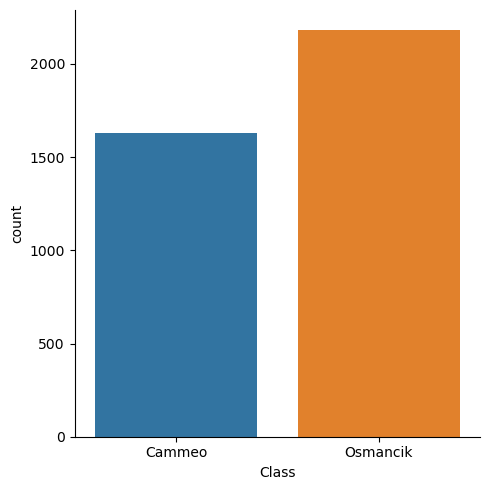

In [101]:
#visualisasi bar chart
sns.catplot(data=df, x='Class', kind='count');

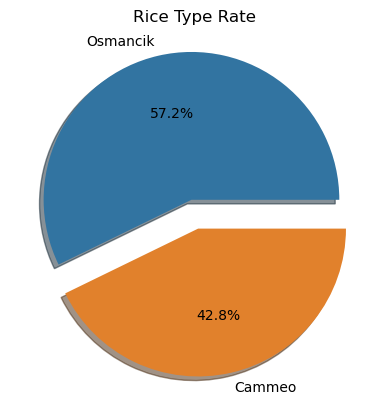

In [102]:
#Visualisasi pie chart dan presentase data
cmap = ["#3274a1", "#e1812c","#3a923a","#c03d3e","#857aab","#8d7866"]
classTarget = df["Class"].value_counts()
plt.pie(x = classTarget,
        explode = [0.1, 0.1],
        labels = classTarget.index,
        colors = cmap,
        autopct = "%.1f%%", 
        shadow = True)
plt.title("Rice Type Rate");

In [103]:
#info mengenai data
def dataInfo(df):
    data_info = pd.DataFrame(index=df.columns)
    data_info['TipeData'] = df.dtypes #tipe data tiap kolom
    return data_info

# Bentuk data
print("Total baris dan kolom :",df.shape,"\n")
# tampilkan fungsi dataInfo
dataInfo(df)

Total baris dan kolom : (3810, 8) 



,TipeData
Area,int64
Perimeter,float64
Major_Axis_Length,float64
Minor_Axis_Length,float64
Eccentricity,float64
Convex_Area,int64
Extent,float64
Class,object


<Axes: >

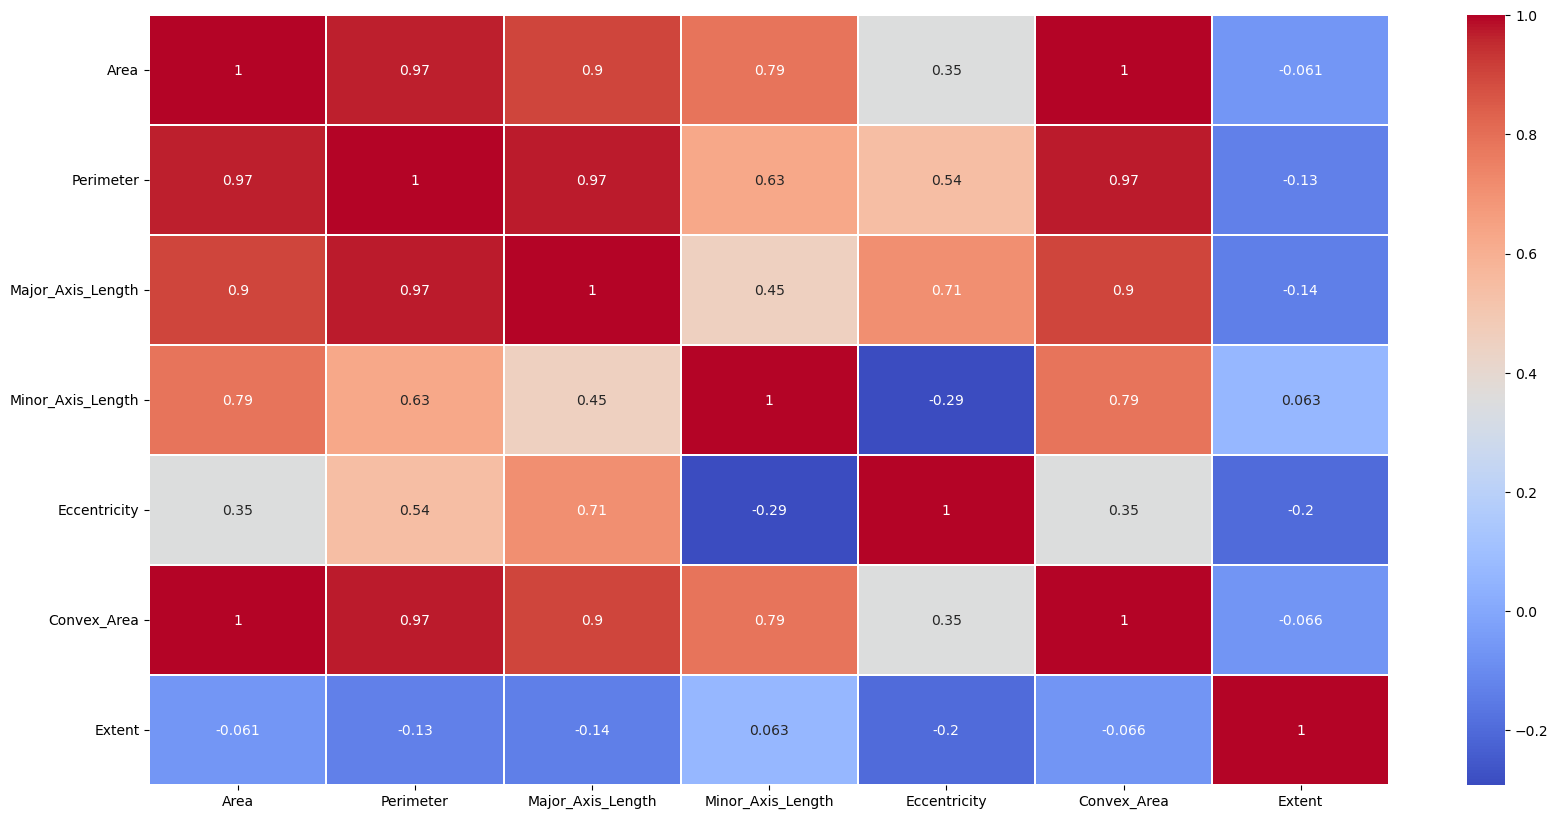

In [104]:
#cari korelasi antar data
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

Terdapat beberapa fitur yang memiliki korelasi tinggi, yaitu AREA, PERIMETER, MAJOR_AXIS_LENGTH, MINOR_AXIS_LENGTH, dan CONVEX AREA

<Figure size 250x200 with 0 Axes>

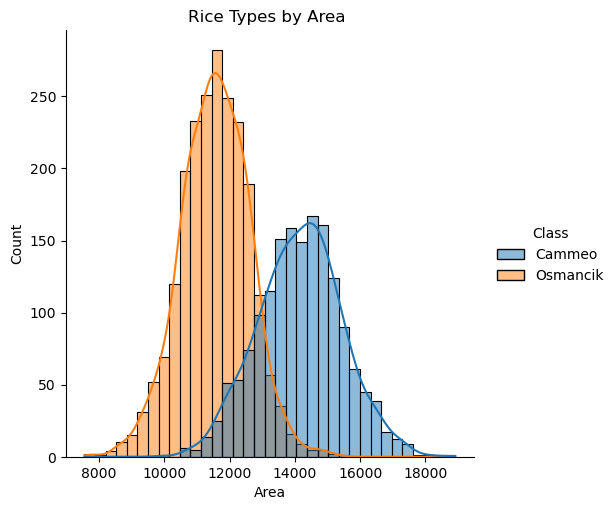

<Figure size 250x200 with 0 Axes>

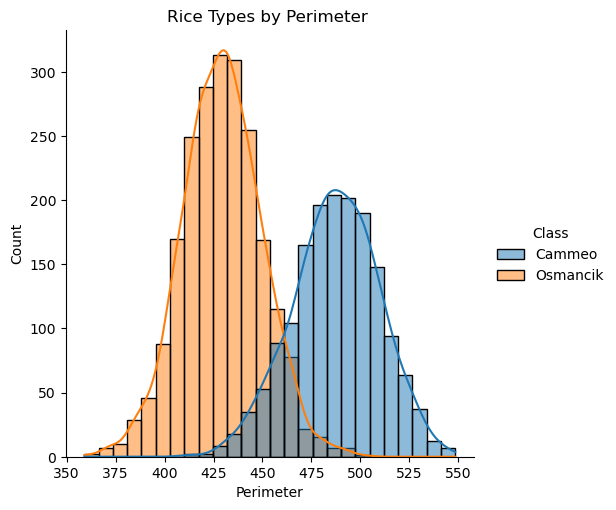

<Figure size 250x200 with 0 Axes>

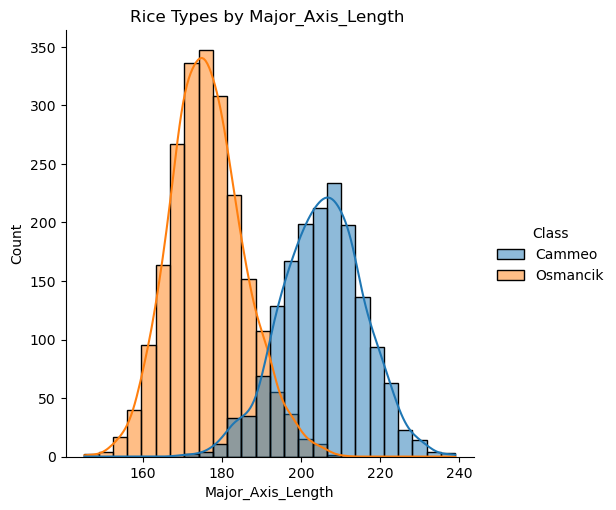

<Figure size 250x200 with 0 Axes>

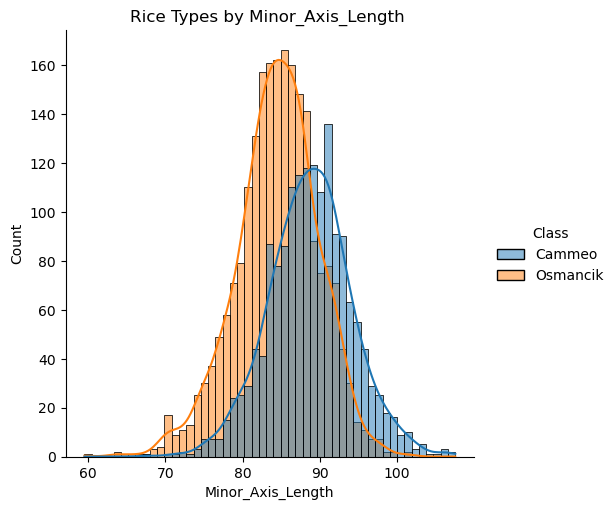

<Figure size 250x200 with 0 Axes>

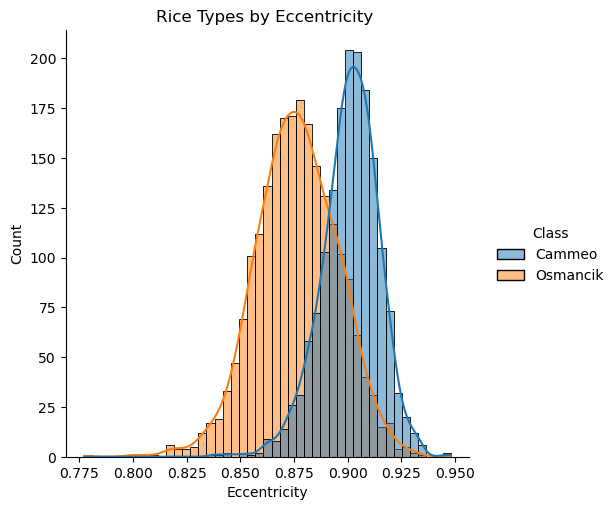

<Figure size 250x200 with 0 Axes>

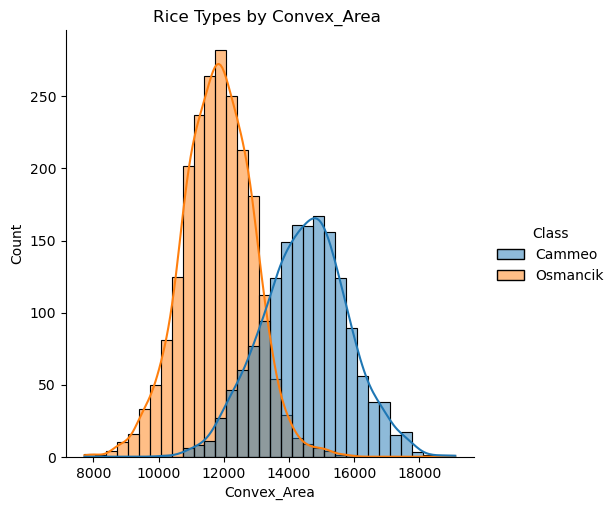

<Figure size 250x200 with 0 Axes>

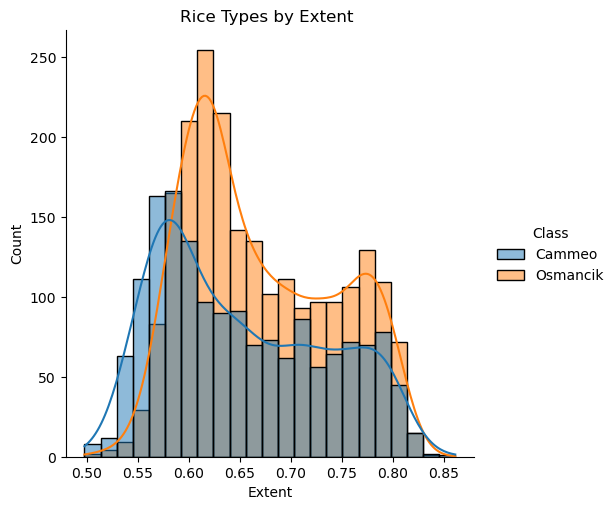

In [105]:
columns = df.columns[:len(df.columns) - 1]
for column in columns:
    plt.figure(figsize = (5,4), dpi = 50)
    sns.displot(data = df, 
                x = str(column), 
                kde = True, 
                hue = "Class").set(title = "Rice Types by {} ".format(str(column)))
    plt.show()

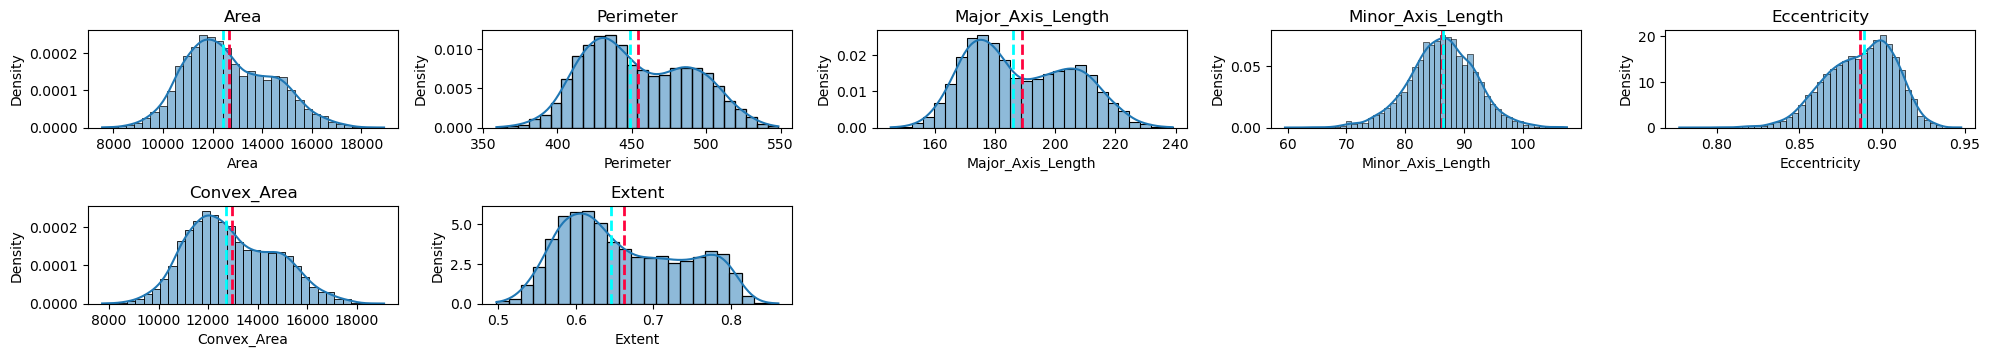

In [106]:
#visualisasi distribusi data
numerical_features=[col for col in df.columns if df[col].dtype!='O']
fig = plt.figure(figsize = (20,5))
for index,column in enumerate(numerical_features) :
    plt.subplot(3,5,index+1)
    sns.histplot(df[column], kde=True, stat="density")
    feature = df[column]
    ax = fig.gca()
    ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2)  #warna merah untuk mean
    ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2) #biru untuk median
    plt.title(f'{column.title()}')
    plt.tight_layout()

In [107]:
# cek skew dan kurtosis dari fitur numerik
num_data=df[numerical_features]
num_data.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Area,0.325158,-0.431082
Perimeter,0.221362,-0.840243
Major_Axis_Length,0.260242,-0.951802
Minor_Axis_Length,-0.134897,0.562113
Eccentricity,-0.449249,0.071073
Convex_Area,0.319782,-0.465824
Extent,0.343819,-1.030101


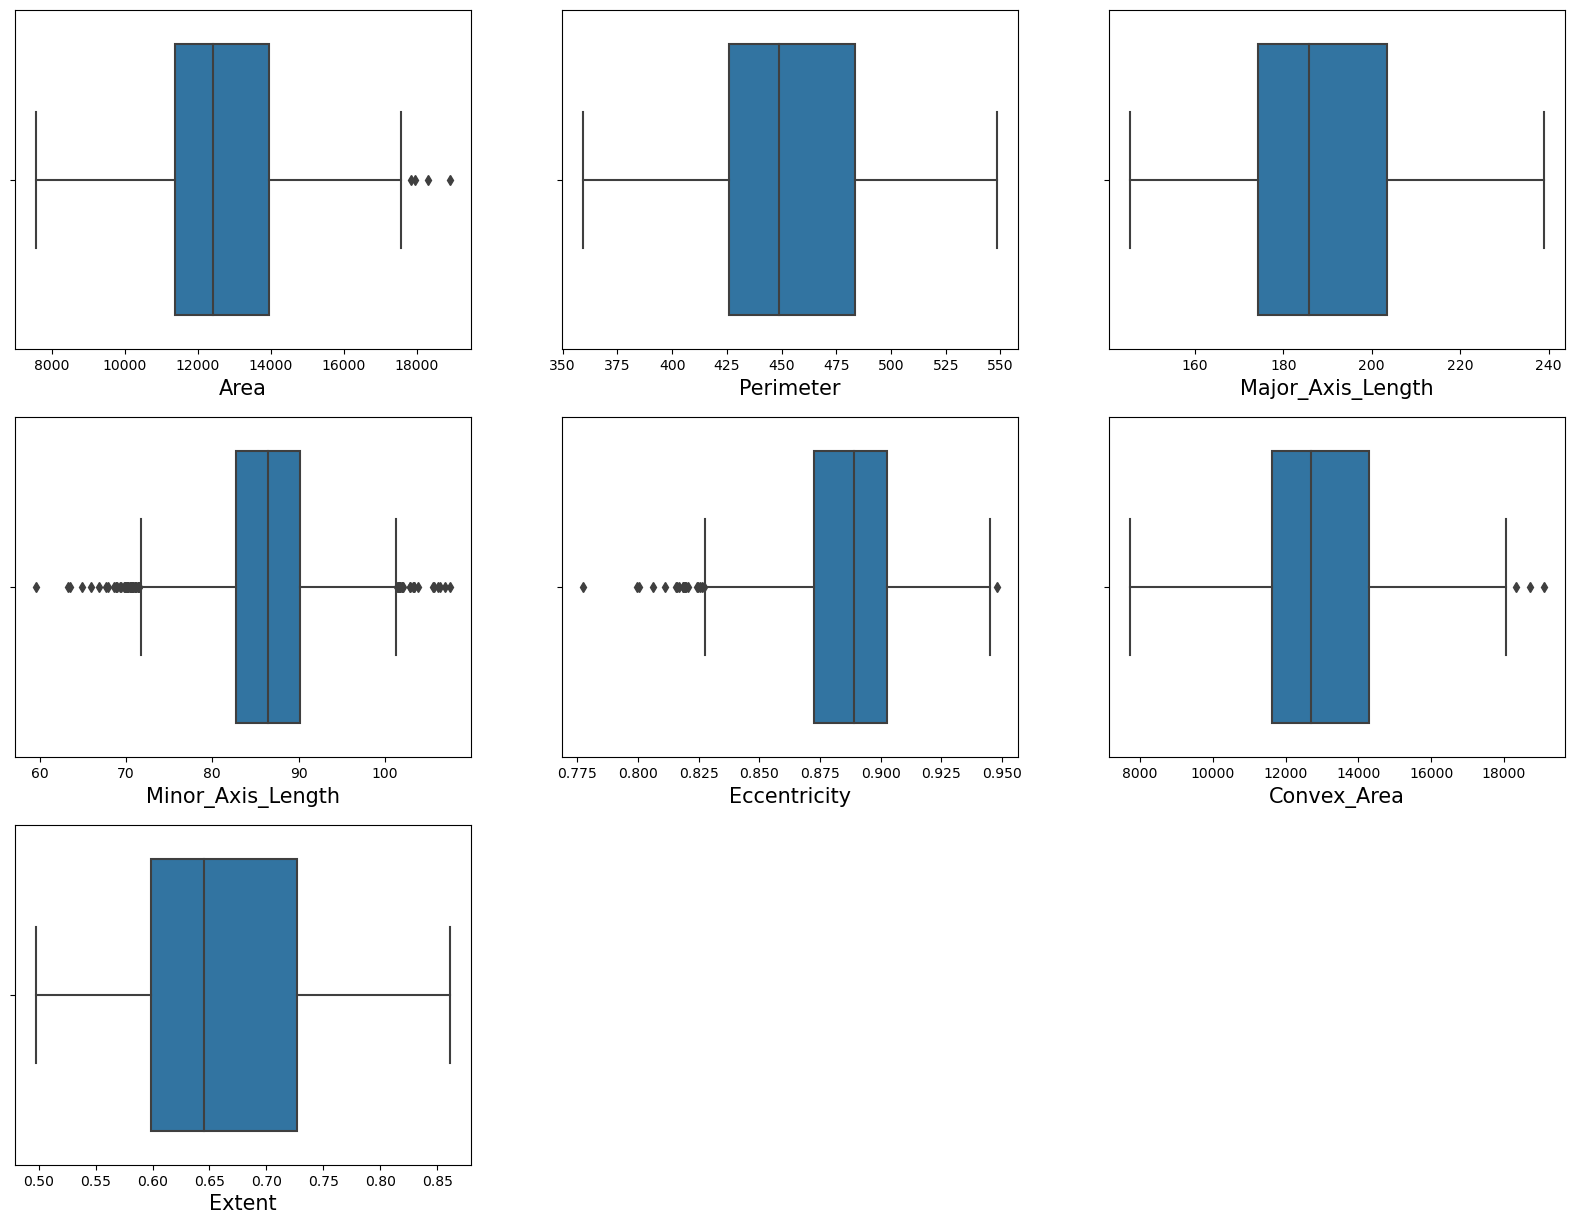

In [108]:
plt.figure(figsize = (20,15))
for i, col in enumerate(df.iloc[:, 0:7]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data = df.iloc[:, 0:7], x = col)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 10)

In [109]:
# How many outliers of each feature?
def detectOutliers(df):
    outliers = pd.DataFrame(columns = ["Fitur", "Banyak Outliers"])
    features = []
    numbers = []
    for col in df.columns:
        features.append(col)
        #Return values at the given quantile
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)
        num_of_out = df.loc[(df[col] < lower_fence) | (df[col] > upper_fence)].shape[0]
        numbers.append(num_of_out)

        lower_fence = df.loc[(df[col] < lower_fence), col]
        upper_fence = df.loc[(df[col] > upper_fence), col] 

    outliers["Fitur"] = features
    outliers["Banyak Outliers"] = numbers
    print("Banyaknya Outliers:", outliers["Banyak Outliers"].sum())
    print("Presentase outliers: % {:.3f}".format(outliers["Banyak Outliers"].sum()/df.shape[0]))
    return outliers  
detectOutliers(df.iloc[:, 0:7])

Banyaknya Outliers: 93
Presentase outliers: % 0.024


,Fitur,Banyak Outliers
0,Area,4
1,Perimeter,0
2,Major_Axis_Length,0
3,Minor_Axis_Length,65
4,Eccentricity,21
5,Convex_Area,3
6,Extent,0


## <b>Data Pre-processing</b>

In [110]:
#Ubah data kategorik menjadi numerik 
#Cammeo = 0 dan Osmancik = 1
from sklearn.preprocessing import LabelEncoder
df= df.apply(LabelEncoder().fit_transform)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,2545,3675,3792,1540,3779,2578,415,0
1,2332,3106,3007,3193,2309,2387,1321,0
2,2324,3289,3492,2285,3431,2340,2483,0
3,1733,2137,2273,2196,2069,1696,1830,0
4,2343,3438,3353,2668,3133,2462,1909,0
...,...,...,...,...,...,...,...,...
3805,777,527,588,1729,578,733,2353,1
3806,889,754,368,2709,110,900,2494,1
3807,1368,1642,1766,2019,1439,1340,1570,1
3808,119,76,98,291,1060,113,2101,1


In [111]:
# Remove outliers
def removeOutliers(df):
    for col in df.iloc[:, 1:14].columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)

        df = df[(df[col] > lower_fence) & (df[col] < upper_fence)]
    return df

In [112]:
# df = removeOutliers(df)
# df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,2545,3675,3792,1540,3779,2578,415,0
1,2332,3106,3007,3193,2309,2387,1321,0
2,2324,3289,3492,2285,3431,2340,2483,0
3,1733,2137,2273,2196,2069,1696,1830,0
4,2343,3438,3353,2668,3133,2462,1909,0
...,...,...,...,...,...,...,...,...
3805,777,527,588,1729,578,733,2353,1
3806,889,754,368,2709,110,900,2494,1
3807,1368,1642,1766,2019,1439,1340,1570,1
3808,119,76,98,291,1060,113,2101,1


In [113]:
#drop fitur yang memiliki korelasi tinggi terhadapt area, yaitu : 
#"Perimeter" , "Major_Axis_Length", "Minor_Axis_Length", dan "Convex Area"
df1 = le_df
df1.drop(columns = ["Perimeter" , "Major_Axis_Length", "Minor_Axis_Length", "Convex_Area"], axis=1, inplace=True)
df1


,Area,Eccentricity,Extent,Class
0,2545,3779,415,0
1,2332,2309,1321,0
2,2324,3431,2483,0
3,1733,2069,1830,0
4,2343,3133,1909,0
...,...,...,...,...
3805,777,578,2353,1
3806,889,110,2494,1
3807,1368,1439,1570,1
3808,119,1060,2101,1


In [114]:
dataInfo(df1)

,TipeData
Area,int64
Eccentricity,int64
Extent,int64
Class,int32


#### Ringkasan Metode
Silahkan double click cell ini dan tulis ringkasan metode!

In [115]:
# Baseline Model
# Write your code here



In [116]:
# Model Exploration (at least 3 scheme)
# Write your code here



In [117]:
# Evaluation
# Write your code here



#### Hasil dan Analisis
Silahkan double click cell ini dan tulis hasil dan analisis!

#### Kesimpulan
Silahkan double click cell ini dan tulis kesimpulan!